In [2]:
# analisis y estadistica
import numpy as np
import pandas as pd
import scipy as sc


# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
prov = pd.read_excel('../output/data_proveedores.xlsx', sheet_name='PROVEEDORES')
repleg = pd.read_excel('../output/data_proveedores.xlsx', sheet_name='REP_LEGALES')
ingresos = pd.read_excel('../output/PROV_CPE_2005-2024_NOV.xlsx')
print(prov.columns, repleg.columns)

Index(['NIT', 'Nombre', 'tipo_organizacion', 'actividad_economica', 'notario',
       'nit_notario', 'departamento', 'municipio', 'direccion', 'telefono',
       'inscripcion_sat', 'estado_sat', 'estado_rgae', 'fecha_constitucion',
       'inscripcion_provisional_registro_mercantil',
       'inscripcion_definitiva_registro_mercantil'],
      dtype='object') Index(['NIT_empresa', 'representante_legal', 'NIT_representante'], dtype='object')


In [4]:
print(repleg.info())
print()
print(prov.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6635 entries, 0 to 6634
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NIT_empresa          6635 non-null   object
 1   representante_legal  6635 non-null   object
 2   NIT_representante    6635 non-null   object
dtypes: object(3)
memory usage: 155.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7923 entries, 0 to 7922
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   NIT                                         7923 non-null   object
 1   Nombre                                      7923 non-null   object
 2   tipo_organizacion                           7914 non-null   object
 3   actividad_economica                         3811 non-null   object
 4   notario                                     3587 non-null

In [5]:
repleg_x_empresa = repleg.groupby('NIT_empresa').size().reset_index(name='rep_x_empresa')
repleg_x_empresa.sort_values(by='rep_x_empresa', ascending=False)

,NIT_empresa,rep_x_empresa
1205,321737,18
1227,326445,14
1269,334944,13
1281,336211,13
1258,332216,12
...,...,...
3851,99303213,1
3837,986797K,1
3842,98965883,1
3843,99034573,1


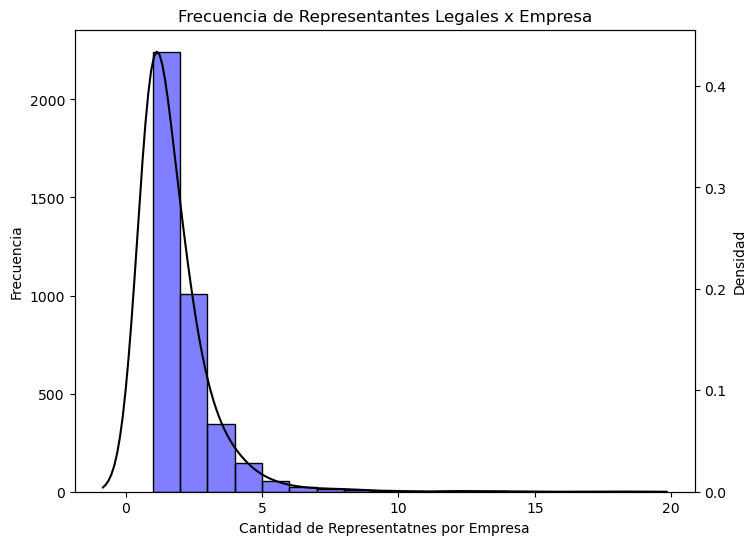

In [6]:
fig, ax1 = plt.subplots(figsize=(8,6))

sns.histplot(repleg_x_empresa['rep_x_empresa'], binwidth=1, kde=False, color='blue', alpha=0.5, ax=ax1, label='Cantidad')
ax1.set_xlabel('Cantidad de Representatnes por Empresa')
ax1.set_ylabel('Frecuencia', color='black')
ax1.tick_params(axis='y', labelcolor='black')


ax2 = ax1.twinx()


sns.kdeplot(repleg_x_empresa['rep_x_empresa'], bw_method=0.5, color='black', ax=ax2, label='Densidad')
ax2.set_ylabel('Densidad', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Frecuencia de Representantes Legales x Empresa')

plt.show()


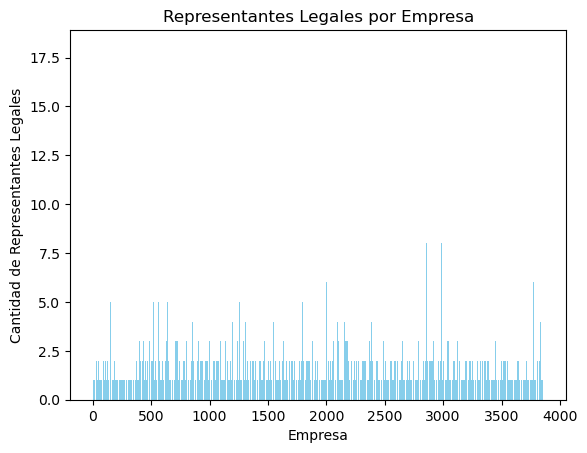

In [7]:
plt.bar(range(len(repleg_x_empresa)), repleg_x_empresa.rep_x_empresa, color='skyblue')
#plt.xticks(range(len(repleg_x_empresa)), repleg_x_empresa.NIT_empresa, rotation=45)
plt.xlabel('Empresa')
plt.ylabel('Cantidad de Representantes Legales')
plt.title('Representantes Legales por Empresa')
plt.show()

In [8]:
emp_x_repleg = repleg.groupby(by=['representante_legal', 'NIT_representante']).size().reset_index(name='cantidad_empresas')
emp_x_repleg.sort_values(by='cantidad_empresas', ascending=False).head(20)

,representante_legal,NIT_representante,cantidad_empresas
3631,MENENDEZ BAILON HECTOR RAUL,8217033,5
3002,LEAL MONTERROSO JUAN CARLOS,12752894,5
5208,SANCHEZ BOCHE JOSE ANTONIO,9511040,5
3007,LEAL TOLEDO JORGE ROBERTO,16024931,5
2676,HERNANDEZ LOPEZ ROEL TIMOTEO,45667098,5
374,ARGUETA JUAREZ SERGIO ABRAHAM,92014062,5
1241,COHEN MORY MISHAAN DEBORAH ANN,6633617,5
1240,COHEN MORY ALBERTO DAVID,5616689,5
582,BARRIENTOS SAGASTUME EDUARDO DE JESUS,6562388,5
2467,GRAMAJO BARRIOS ERWIN ESTUARDO,14262193,4


In [9]:
ultimo_anio = ingresos[ingresos['ANIO'] == 2024]
ultimo_anio = ultimo_anio.drop_duplicates().reset_index(drop=True)
ultimo_anio

,NIT,NOMBRE,TOTAL,CANTIDAD,ANIO
0,22345388,J.I. COHEN SOCIEDAD ANONIMA,9.413079e+08,11378,2024
1,320811,COMPAÃIA FARMACEUTICA LANQUETIN SOCIEDAD ANONIMA,7.359447e+08,4325,2024
2,330388,CREDITO HIPOTECARIO NACIONAL DE GUATEMALA,7.279851e+08,213,2024
3,14946211,DISTRIBUIDORA DE ELECTRICIDAD DE OCCIDENTE SOC...,4.400360e+08,48,2024
4,2455404,INSTITUTO NACIONAL DE ELECTRIFICACION,3.603112e+08,4,2024
...,...,...,...,...,...
2015,7066430,RABONI SOCIEDAD ANONIMA,9.000000e+05,1,2024
2016,18637973,MOTARAXJALABNERBENIGNO MISAEL,9.000000e+05,1,2024
2017,65873971,POCASANGREORANTESANIBAL,9.000000e+05,1,2024
2018,1125087,CASALSBONIFASIJAIME,9.000000e+05,1,2024


In [10]:
repleg_monto = pd.merge(repleg, ultimo_anio[['NIT', 'TOTAL']], left_on='NIT_empresa', right_on='NIT', how='left')

repleg_monto = repleg_monto[repleg_monto['TOTAL'].notna()]


# cantidad
rmcantidad = repleg_monto.groupby(by=['representante_legal', 'NIT_representante']).size().reset_index(name='Cantidad empresas')
# monto
rmtotal = repleg_monto.groupby(by=['representante_legal', 'NIT_representante'])['TOTAL'].sum().reset_index(name='Monto Total')
# join
rmfull = pd.merge(rmcantidad, rmtotal, on=['representante_legal', 'NIT_representante'], how='inner')

In [12]:
rmfull.describe()

,Cantidad empresas,Monto Total
count,1793.000000,1.793000e+03
mean,1.064696,2.579122e+07
std,0.293622,7.772700e+07
min,1.000000,9.000000e+05
25%,1.000000,1.911344e+06
50%,1.000000,4.606839e+06
75%,1.000000,1.655009e+07
max,4.000000,9.489499e+08


In [28]:
rmfull['Monto Total'].max()

np.float64(948949929.31)

In [29]:
rmfull['Monto Total'] = rmfull['Monto Total'].astype('Float64')
rmfull.sort_values(by='Cantidad empresas', ascending=False).head(10)

,representante_legal,NIT_representante,Cantidad empresas,Monto Total
177,BARRIENTOS SAGASTUME EDUARDO DE JESUS,6562388,4,56305332.4
122,ARGUETA JUAREZ SERGIO ABRAHAM,92014062,4,56305332.4
1540,SALAZAR PAREDES WILLIAN ERNESTO,44379374,4,56305332.4
1788,ZONTA SING JIMMY,58946136,3,52372687.58
362,COHEN MORY ALBERTO DAVID,5616689,3,948949929.31
414,CÁCERES BARRIOS ABDEL JORGE ANGEL,30056446,3,58226384.32
1056,MELENDEZ ORTIZ FLORIAN CARMEN JUDITH,7186169,3,42055198.85
563,FIGUEROA DUARTE EVERST OSWALDO,51987996,3,58226384.32
210,BLANK GIRÓN KARL CHRISTIAN,55912680,3,74227808.67
363,COHEN MORY MISHAAN DEBORAH ANN,6633617,3,948949929.31


In [30]:
total_emp_rep = repleg_monto.groupby(by=['representante_legal', 'NIT_representante'])['TOTAL'].sum().reset_index(name='monto_empresas_representadas')
total_emp_rep

,representante_legal,NIT_representante,monto_empresas_representadas
0,ABRIL TOLEDO HERNANDEZ MARIA LESBIA,1291041,1488372.00
1,ACAJABON GARCIA JOSE INES,7416342,40247350.87
2,ACEITUNO RUBIO JIMÉNEZ JENY BETHZAIDA,8163294,1281296.62
3,ACEVEDO ARREDONDO MAURICIO PABLO,95488235,23913433.41
4,ACEVEDO VERA CLAUDIA YANET,44089635,8386713.91
...,...,...,...
1788,ZONTA SING JIMMY,58946136,52372687.58
1789,ZUBIETA MARCO RODRIGO,97138185,89731586.56
1790,ZUÑIGA ARGUETA EDWIN OSWALDO,16098668,20340007.26
1791,ZUÑIGA CONTRERAS GEOVANY,45520666,5945044.44


In [ ]:
repleg[repleg['NIT_representante'].isin(['6562388', '92014062', '44379374'])].sort_values(by='NIT_empresa', ascending=True)

,NIT_empresa,representante_legal,NIT_representante
141,4887328,ARGUETA JUAREZ SERGIO ABRAHAM,92014062
142,4887328,BARRIENTOS SAGASTUME EDUARDO DE JESUS,6562388
144,4887328,SALAZAR PAREDES WILLIAN ERNESTO,44379374
3093,7110588,ARGUETA JUAREZ SERGIO ABRAHAM,92014062
3094,7110588,BARRIENTOS SAGASTUME EDUARDO DE JESUS,6562388
3100,7110588,SALAZAR PAREDES WILLIAN ERNESTO,44379374
4282,82374929,ARGUETA JUAREZ SERGIO ABRAHAM,92014062
4283,82374929,BARRIENTOS SAGASTUME EDUARDO DE JESUS,6562388
3912,82854440,ARGUETA JUAREZ SERGIO ABRAHAM,92014062
3913,82854440,BARRIENTOS SAGASTUME EDUARDO DE JESUS,6562388


In [34]:
mismos_montos = rmfull[rmfull['Monto Total'].duplicated(keep=False)].sort_values(by='Monto Total', ascending=False)
mismas_cantidades = rmfull[rmfull['Cantidad empresas'].duplicated(keep=False)].sort_values(by='Cantidad empresas', ascending=False)

In [36]:
mismas_cantidades

,representante_legal,NIT_representante,Cantidad empresas,Monto Total
177,BARRIENTOS SAGASTUME EDUARDO DE JESUS,6562388,4,56305332.4
122,ARGUETA JUAREZ SERGIO ABRAHAM,92014062,4,56305332.4
1540,SALAZAR PAREDES WILLIAN ERNESTO,44379374,4,56305332.4
1788,ZONTA SING JIMMY,58946136,3,52372687.58
362,COHEN MORY ALBERTO DAVID,5616689,3,948949929.31
...,...,...,...,...
1772,YLLESCAS LOPEZ MIGUEL ANGEL,1869132,1,1175367.14
1773,YOC DE LA CRUZ JUAN PABLO,788852K,1,15240535.84
1774,YOL PÉREZ GLADIS MARISSELA,63533782,1,1948123.8
1775,YOL PÉREZ WÍLLIAM EFRAÍN,13569813,1,62678383.29
